<a href="https://colab.research.google.com/github/Ayonator77/Scientific-Computing/blob/main/PowerMethodPres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.patches as patches
from matplotlib import animation, rc

This function implements the power method to compute the dominant
eigenvalue and coresponding vector of a matrix $A$. It also uses an initial
vector $\vec{x_0}$ and a max number of iterations $n$. note the returned eigenvalue and
vector appoach their actual values as $n$ grow very large

In [ ]:
def powerMethod(A, x, n):
    phi = lambda x: x[0]
    iterations = []
    for i in range(n):
        y = A.dot(x)
        eva = phi(y)/phi(x)
        x = y/np.linalg.norm(y)
        iterations.append(x)
    return eva, x, iterations

The code below plots the iteration of $\vec{x_k}$, $(\text{for   } k = 0,1,..,n)
$ we see that with each successive step $(k \rightarrow \infty)$,$\ $ $\vec{x_k} \ $approches the eigenvector.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


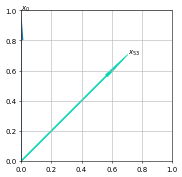

In [ ]:
A = np.array([[3, 1],
             [1, 3]])
x_0 = np.array([0, 1])
eva, eve, it = powerMethod(A, x_0, 55)
val, vec = np.linalg.eig(A)
v_1 = it[0]
arrow = patches.Arrow(0, 0, 0, 1, width=0.05)
init_arrow = patches.Arrow(0, 0, vec[0, 0], vec[1, 0], width=0.03)

fig = plt.figure()
fig.set_dpi(50)
ax = fig.gca()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')


def init():
    ax.annotate("$x_0$", xy=(0, 1))
    ax.add_patch(arrow)
    return arrow,


def animate(t):
  ax.clear()
  plt.grid()
  ax.annotate("$x_{"+str(t)+"}$", xy =(it[t][0], it[t][1]))
  arrow = plt.Arrow(0, 0, it[t][0], it[t][1], width=0.03, color=(random.random(),random.random(),random.random()))
  ax.add_patch(arrow)
  return arrow,
rc('animation', html='jshtml')

anim = animation.FuncAnimation(fig, animate,frames = 54, init_func=init, interval=100, blit=False)
anim

In [ ]:
x_init = np.array([1, 1, 1])
A_new = np.array([[-2, -1, 0],[-1, -2, -1],[0, -1, -2]])
ea, ev, seq = powerMethod(A_new, x_init, 4)
print(seq)

[array([-0.51449576, -0.68599434, -0.51449576]), array([0.50251891, 0.70352647, 0.50251891]), array([-0.50043309, -0.70649377, -0.50043309]), array([0.50007433, 0.70700164, 0.50007433])]
